In [1]:
from matplotlib import pyplot as plt
from whar_datasets import (
    get_dataset_cfg,
    WHARDatasetID,
    PostProcessingPipeline,
    PreProcessingPipeline,
    Loader,
    LOSOSplitter,
    KFoldSplitter,
    LGSOSplitter,
)

In [2]:
cfg = get_dataset_cfg(WHARDatasetID.PAMAP2)

cfg.parallelize = True
cfg.in_memory = True
force_recompute = False
# force_recompute = [False, True, True]

In [3]:
pre_pipeline = PreProcessingPipeline(cfg)
activity_df, session_df, window_df = pre_pipeline.run(force_recompute)

2026-02-19 16:30:33,913 - whar-datasets - INFO - Running DownloadingStep
2026-02-19 16:30:33,913 - whar-datasets - INFO - Checking hash for DownloadingStep
2026-02-19 16:30:33,914 - whar-datasets - INFO - Hash is up to date
2026-02-19 16:30:33,914 - whar-datasets - INFO - Running ParsingStep
2026-02-19 16:30:33,915 - whar-datasets - INFO - Checking hash for ParsingStep
2026-02-19 16:30:33,915 - whar-datasets - INFO - Hash is up to date
2026-02-19 16:30:33,916 - whar-datasets - INFO - Running WindowingStep
2026-02-19 16:30:33,916 - whar-datasets - INFO - Checking hash for WindowingStep
2026-02-19 16:30:33,918 - whar-datasets - INFO - Hash is not up to date
2026-02-19 16:30:33,921 - whar-datasets - INFO - Validating common format
2026-02-19 16:30:33,940 - whar-datasets - INFO - Validating sessions (parallelized)


[########################################] | 100% Completed | 3.82 ss


2026-02-19 16:30:38,095 - whar-datasets - INFO - Common format validated.
2026-02-19 16:30:38,096 - whar-datasets - INFO - Compute windowing
2026-02-19 16:30:38,096 - whar-datasets - INFO - Selecting activities
2026-02-19 16:30:38,107 - whar-datasets - INFO - Processing sessions (parallelized)


[########################################] | 100% Completed | 28.31 s


2026-02-19 16:31:06,999 - whar-datasets - INFO - Saving windowing
2026-02-19 16:31:23,303 - whar-datasets - INFO - Loading windowing
2026-02-19 16:31:23,322 - whar-datasets - INFO - activity_ids from 0 to 12
2026-02-19 16:31:23,323 - whar-datasets - INFO - subject_ids from 0 to 8


In [4]:
splitter = LOSOSplitter(cfg)
# splitter = LGSOSplitter(cfg)
# splitter = KFoldSplitter(cfg)

splits = splitter.get_splits(session_df, window_df)
for split in splits:
    print(
        split.identifier,
        len(split.train_indices),
        len(split.val_indices),
        len(split.test_indices),
    )

subject_0 30696 7674 6339
subject_1 35665 8916 128
subject_2 31876 7968 4865
subject_3 31250 7812 5647
subject_4 31674 7918 5117
subject_5 31112 7778 5819
subject_6 31024 7755 5930
subject_7 30214 7553 6942
subject_8 32630 8157 3922


In [5]:
post_pipeline = PostProcessingPipeline(
    cfg, pre_pipeline, window_df, splits[0].train_indices
)
samples = post_pipeline.run(False)

2026-02-19 16:31:23,431 - whar-datasets - INFO - Running SamplingStep
2026-02-19 16:31:23,432 - whar-datasets - INFO - Checking hash for SamplingStep
2026-02-19 16:31:23,434 - whar-datasets - INFO - Hash is not up to date
2026-02-19 16:31:29,482 - whar-datasets - INFO - Computing samples
2026-02-19 16:31:29,482 - whar-datasets - INFO - Getting normalization parameters
2026-02-19 16:31:31,973 - whar-datasets - INFO - Normalizing and transforming windows (parallelized)


[########################################] | 100% Completed | 41.17 s


2026-02-19 16:32:16,701 - whar-datasets - INFO - Saving samples
2026-02-19 16:32:26,485 - whar-datasets - INFO - Loading samples


In [6]:
loader = Loader(session_df, window_df, post_pipeline.samples_dir, samples)
print(len(loader))

44709


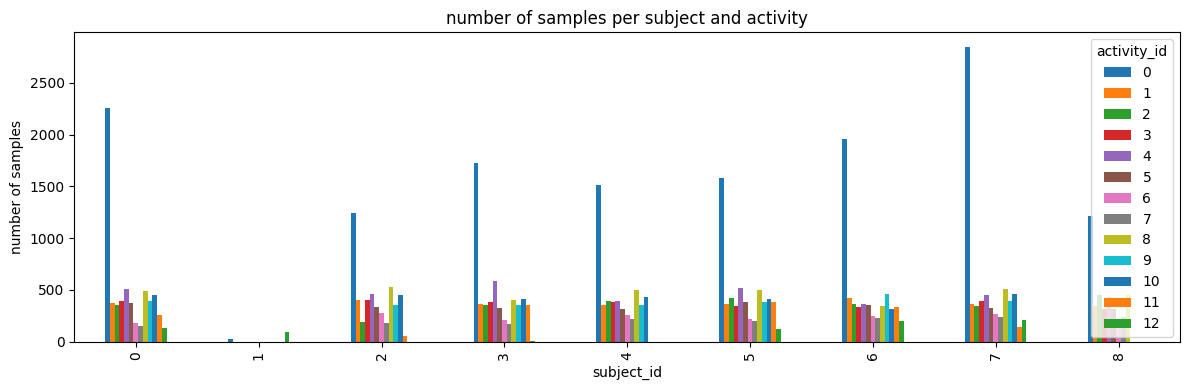

In [9]:
len(loader)
loader.plot_indices_statistics(list(range(len(loader))))

Text(0.5, 1.0, ' Activity: 0, Subject: 6')

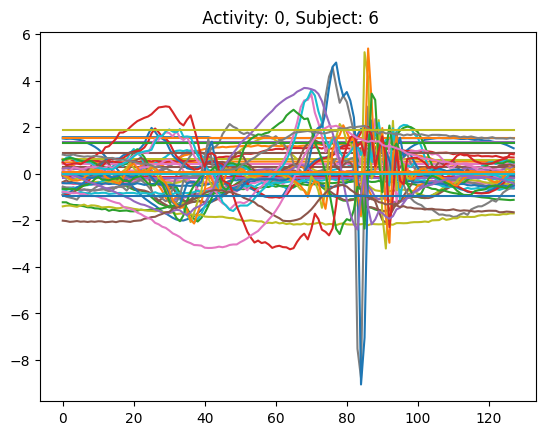

In [28]:
subject_id = None  # 2
activity_id = None  # 3

# index as ra
ya, ys, (x,) = loader.sample_items(1, activity_id=activity_id, subject_id=subject_id)
ya_single = ya[0]
ys_single = ys[0]
x_single = x[0]

plt.plot(x_single)
plt.title(f" Activity: {ya_single}, Subject: {ys_single}")